In [20]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

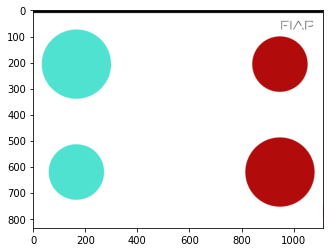

In [21]:
# Leitura da imagem para a cv2
circulo = cv2.imread("circulo.png")

cl_circulo = cv2.cvtColor(circulo, cv2.COLOR_BGR2RGB)


plt.imshow(cl_circulo)


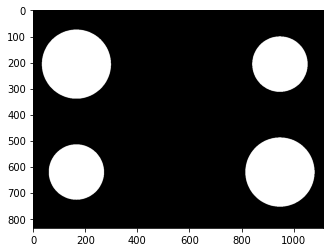

In [22]:
# # Máscara com HSV


circuloHSV = cv2.cvtColor(circulo, cv2.COLOR_BGR2HSV)
#Range menor começando no vermelho
circuloHSV_lower = np.array([0, 165, 89])
#Range maior terminando no verde
circuloHSV_higher = np.array([97, 255, 255])


mask_hsv = cv2.inRange(circuloHSV, circuloHSV_lower, circuloHSV_higher)

plt.imshow(mask_hsv, cmap="Greys_r", vmin=0, vmax=255)

plt.show()




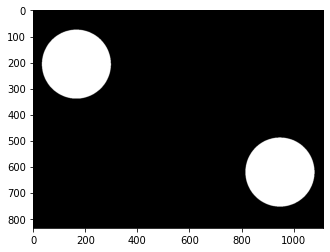

In [23]:
mask_rgb = cv2.cvtColor(mask_hsv, cv2.COLOR_GRAY2RGB)
# Cópia da máscara para ser desenhada "por cima"
contornos_circulos = mask_rgb.copy()
contornos, _ = cv2.findContours(mask_hsv, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

menor1 = None
menor2 = None
# Para encontrar os menores circulos, fizemos uma lista e a ordenamos.
lista =[]
for i in contornos:
    area = int(cv2.contourArea(i))
    lista.append(area)
listaOrdenada = sorted(lista)
#Se o menor e o segundo menor equivalerem as respectivas áreas, então desenha o contorno
for c in contornos:
  area = int(cv2.contourArea(c))
  if listaOrdenada[0] == area:
    menor1 = c
  elif listaOrdenada[1] == area:
    menor2 = c

# Referência para thickness na drawContours: https: // stackoverflow.com/questions/19222343/filling-contours-with-opencv-python
# Essa propriedade (thickness) preenche o conteúdo do contorno, pintando os menores
cv2.drawContours(contornos_circulos, [menor1], -1, [0, 0, 0], thickness=cv2.FILLED)
cv2.drawContours(contornos_circulos, [menor2], -1, [0, 0, 0], thickness=cv2.FILLED)

plt.imshow(contornos_circulos)


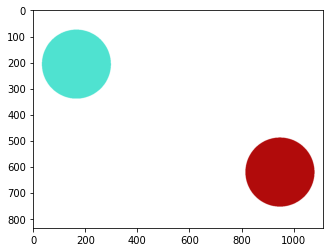

In [32]:

#Referência para uso de bitwiseNot e bitwiseOr: https://www.pyimagesearch.com/2021/01/19/opencv-bitwise-and-or-xor-and-not/
#Inverte os pixels
bl_circulo = cv2.bitwise_not(contornos_circulos)

#Utilizando bitwiseOr para não carregar da imagem original os dois círculos que haviam sido eliminados
img = cv2.bitwise_or(cl_circulo, bl_circulo)
plt.imshow(img)
# plt.imshow(cl_circulo)
